<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/korea/blob/main/air_polution_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [EDA] practice by air polution of seoul data
```
"데이터 과학의 80%는 데이터 클리닝에 소비되고, 나머지 20%는 데이터 클리닝하는 시간을 불평하는데 쓰인다."
- Kaggle 창립자
```
그만큼 데이터 전처리가 중요하다는 의미죠!!

# 0. Before EDA
- [Learning Pandas library](https://www.kaggle.com/learn/pandas)
- [knowing DataStructure](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)
- [Learning Visualization](https://www.kaggle.com/learn/data-visualization)

is very helpful your studying ^^

# 1. Library & Data Load

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/한국분석/air_pollution_in_seoul/AirPollutionSeoul/Measurement_summary.csv')

# 2. Data

## 2.1 Data 구조

## [참고] Pandas
- Series & DataFrame
- loc & iloc
- groupby & sortby
- concat
- drop

In [5]:
# find row, column
df.shape

(647511, 11)

In [6]:
# look DataFrame
df.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0


In [7]:
# look detail
df.describe()

,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
count,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000
mean,113.000221,37.553484,126.989340,-0.001795,0.022519,0.017979,0.509197,43.708051,25.411995
std,7.211315,0.053273,0.078790,0.078832,0.115153,0.099308,0.405319,71.137342,43.924595
min,101.000000,37.452357,126.835151,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,107.000000,37.517528,126.927102,0.003000,0.016000,0.008000,0.300000,22.000000,11.000000
50%,113.000000,37.544962,127.004850,0.004000,0.025000,0.021000,0.500000,35.000000,19.000000
75%,119.000000,37.584848,127.047470,0.005000,0.038000,0.034000,0.600000,53.000000,31.000000
max,125.000000,37.658774,127.136792,3.736000,38.445000,33.600000,71.700000,3586.000000,6256.000000


In [8]:
# dytype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Measurement date  647511 non-null  object 
 1   Station code      647511 non-null  int64  
 2   Address           647511 non-null  object 
 3   Latitude          647511 non-null  float64
 4   Longitude         647511 non-null  float64
 5   SO2               647511 non-null  float64
 6   NO2               647511 non-null  float64
 7   O3                647511 non-null  float64
 8   CO                647511 non-null  float64
 9   PM10              647511 non-null  float64
 10  PM2.5             647511 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 54.3+ MB


In [9]:
# find NA, NULL, NAN
df.isnull().sum()

,0
Measurement date,0
Station code,0
Address,0
Latitude,0
Longitude,0
SO2,0
NO2,0
O3,0
CO,0
PM10,0


## 2.2 column
- Latitude & Longitude
- S02(이산화 황)
- N02(이산화 질소)
- 03(오존)
- CO(일산화 탄소)
- PM10(미세먼지)
- PM2.5(초 미세먼지)

In [10]:
# 각 column별 value
df.nunique()

# station code, Adress, Latitude, Longtitude 가 25개의 다른 지역에서 조사함을 보여줌

,0
Measurement date,25906
Station code,25
Address,25
Latitude,25
Longitude,25
SO2,186
NO2,132
O3,253
CO,172
PM10,551


# 3. Extracting Data
- ## 3.1 시간별 미세먼지 농도 변화 확인
- ## 3.2 미세먼지에 영항을 미치는 변인 확인
- ## 3.3 관측소 위치 Longtitude & Latitude

# 3.1 시간별 미세먼지 농도 변화 확인

In [13]:
from datetime import datetime

df['Measurement date'] = df['Measurement date'].astype('datetime64[ns]')
df['hour'] = df.loc[:, "Measurement date"].dt.hour
df = df.drop('Measurement date', axis=1)

df.hour.head(24)

KeyError: 'Measurement date'

In [14]:
data = df.groupby('hour', as_index=False).agg({'SO2':'mean', 'NO2':'mean', 'O3':'mean', 'CO':'mean', 'PM10':'mean', 'PM2.5':'mean'})
data

,hour,SO2,NO2,O3,CO,PM10,PM2.5
0,0,-0.001909,0.024584,0.011626,0.529891,41.944368,24.651817
1,1,-0.002126,0.021533,0.012065,0.524424,40.927181,24.091507
2,2,-0.002047,0.019609,0.012448,0.516841,40.558962,24.103003
3,3,-0.002203,0.018209,0.012198,0.509860,39.303351,23.577686
4,4,-0.002267,0.018247,0.011033,0.507101,39.394380,23.785717
5,5,-0.002303,0.020649,0.008226,0.515338,39.018339,23.413360
6,6,-0.001988,0.025026,0.005753,0.536940,40.044229,23.788876
7,7,-0.001966,0.027204,0.005840,0.562405,40.911421,23.670649
8,8,-0.001507,0.028721,0.008698,0.576376,43.231577,24.484415
9,9,-0.001398,0.027778,0.014076,0.559335,44.089890,24.593978


<Axes: xlabel='hour'>

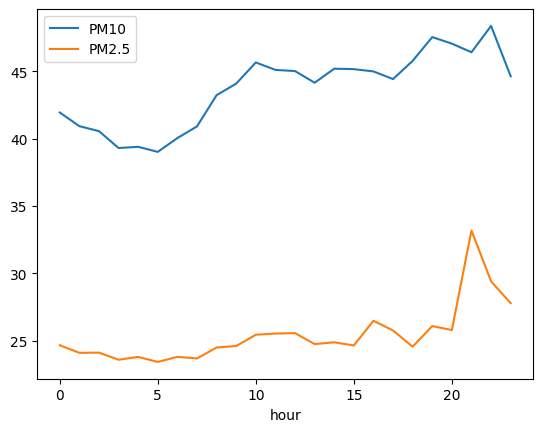

In [15]:
# 미세먼지 농도변화 Hour
data.plot(x='hour', y=['PM10', 'PM2.5'])

```
출근시간 9:00, 퇴근시간 18:00 부터 증가
```
- 요인은 미세먼지를 수집하는 장치의 위치에 따라 다름!

# 3.2 미세먼지에 영항을 미치는 변인 확인

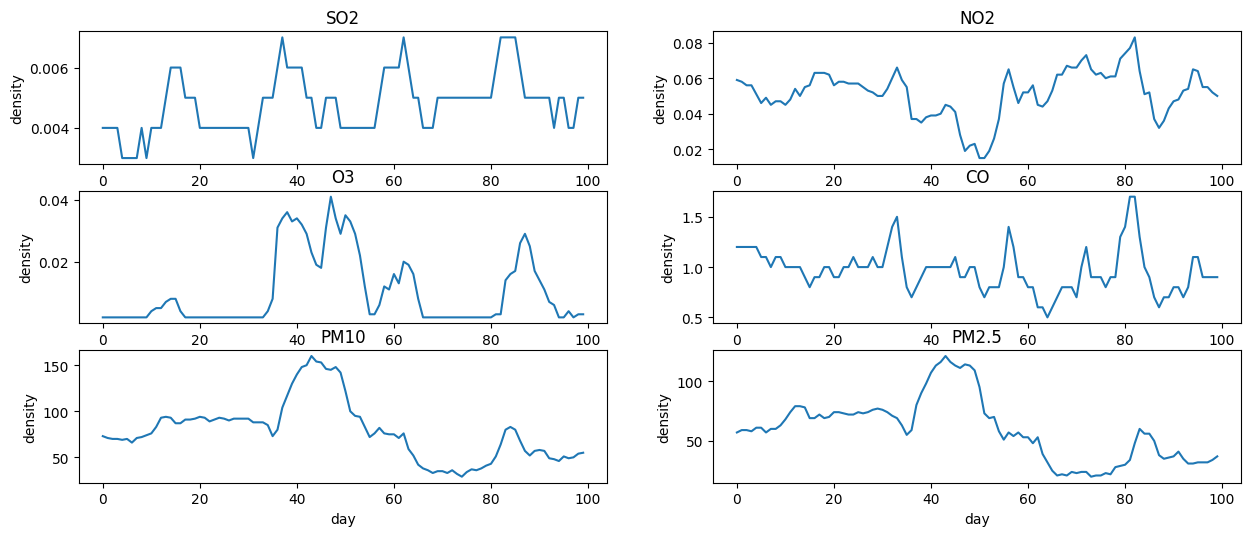

In [16]:
# 데이터 시각화
plt.figure(figsize=(15, 10))

for i in range(4, 10):
    y = df.iloc[:, i]
    plt.subplot(5, 2, i-3)
    plt.title(y.name)
    plt.xlabel('day')
    plt.ylabel('density')
    plt.plot(y[:100])

# O3, !NO2 와 관계가 있음!


# 3.3 관측소 위치 Longtitude & Latitude

In [17]:
# 위도 경도 DataFrame
location = df.groupby('Station code')['PM10'].agg([np.mean])
location['Latitude'] = df['Latitude'].unique() # 절대 이렇게 코드짜면 안되요!
location['Longitude'] = df['Longitude'].unique()
location.head()

<ipython-input-17-72f461a0b840>:2: FutureWarning: The provided callable <function mean at 0x7ea1ea393d90> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  location = df.groupby('Station code')['PM10'].agg([np.mean])


,mean,Latitude,Longitude
Station code,,,
101,37.965605,37.572016,127.005008
102,37.970469,37.564263,126.974676
103,35.539183,37.540033,127.004850
104,42.328468,37.609823,126.934848
105,41.437737,37.593742,126.949679


In [18]:

import folium
seoul = folium.Map(location=[37.55138077230307, 126.98712254969668], zoom_start=12)
for i in range(len(location)):
    marker = folium.Marker([location.iloc[i,1], location.iloc[i,2]], icon=folium.Icon(popup=str(location.index[i]), color='blue', icon='glyphicon glyphicon-cloud-upload')).add_to(seoul)
folium.Marker([37.55195608145124, 127.07362532752212], icon=folium.Icon(popup='Sejoing Univ', color='red', icon='glyphicon glyphicon-home')).add_to(seoul)
seoul

In [19]:
import folium
from folium.plugins import MarkerCluster
def color_select(x):
    if x >= 45:
        return 'red'
    elif x >= 40:
        return 'yellow'
    else:
        return 'blue'

# Map
seoul = folium.Map(location=[37.55138077230307, 126.98712254969668], zoom_start=12)

# Circle
for i in range(len(location)):
    # 관측소
    folium.Circle(location=[location.iloc[i,1], location.iloc[i,2]], radius = location.iloc[i, 0]*20, color=color_select(location.iloc[i,0]),fill_color='#ffffgg').add_to(seoul)
# Marker / Sejong Univ.
folium.Marker([37.55195608145124, 127.07362532752212], icon=folium.Icon(popup='Sejoing Univ.', color='red', icon='glyphicon glyphicon-home')).add_to(seoul)
seoul